Playground for using Paul's profiler code onto Kakuma data

See #TODOs in the src. A part from them:




In [1]:
# import necessary packages
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os


sys.path.append('../src/ProfilePloter')
import ProfilePlotter as profiler



ttem_path = "../Kakuma/inv_xyz/SCI_tTEM_smooth_MOD_inv.xyz"
stem_path_1 = "../Kakuma/inv_xyz/sTEM_202308and202402_MOD_inv.xyz"
stem_path_2 = "../Kakuma/inv_xyz/sTEM_202405and06_MOD_inv.xyz"
profiler_path =  "../Kakuma/inv_xyz/Profiler_202406_MOD_inv.xyz"
# create model object
model = profiler.Model()


# populate model object with dictionaries of ttem data
# dictionaries are appended into a list, importing a dataset twice will simply append it to the list.
# to remove data sets a new model object can be created

model.loadXYZ(ttem_path, mod_name='Kakuma_tTEM', model_type='tTEM')
model.loadXYZ(stem_path_1, mod_name='sTEM_202308and202402_Kakuma', model_type='sTEM')# in plot.addTEMSoundings, stem_model_idx=0
model.loadXYZ(stem_path_2, mod_name='sTEM_202405and06_Kakuma', model_type='sTEM')
model.loadXYZ(profiler_path, mod_name='/Profiler_202406_Kakuma', model_type='profiler')#model_type='Profiler'

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
model.boreholes = []

# get a list of all the borehole paths
borehole_paths = glob("../Kakuma/boreholes"+"/*.dat")

#load from .dat files
model.loadBoreholes(borehole_paths)

# boreholes are also stored as a list of dictionaries, the endelave ones are taken directly from jupiter databases.
#model.boreholes[0]

In [6]:




#prof_coord_paths = glob('../data/profiles' + '/prof*.csv')
prof_coord_paths = glob('../Kakuma/profiles' + '/*.csv') # We assume all .csv files are to be taken

# profile coords are saved as a list of dictionaries
model.loadProfileCoords(prof_coord_paths, file_type='csv')

profile_idx = 13
model.createProfiles(ttem_model_idx=0, profile_idx = profile_idx, interp_radius=100, model_spacing=10) #original interp_radius=50, model_Spacing=10      #24 is short and gives an error

c:\Users\au487220\OneDrive - Aarhus universitet\Documents\Random_scripts\profiler_old\Kakuma\../src/profiler\profiler.py:329: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights, axis=0)


x_ticks position 4: [   0.  200.  400.  600.  800. 1000. 1200. 1400.]
Borehole 1 is 4.380 km from profile, it was not included.
Borehole 12 is 2.508 km from profile, it was not included.
Borehole 13 is 2.240 km from profile, it was not included.
Borehole 18 is 2.197 km from profile, it was not included.
Borehole 3 is 0.419 km from profile, it was not included.
Borehole 4A is 0.125 km from profile, it was included.
Borehole 4E is 0.113 km from profile, it was included.
Borehole 5B is 0.879 km from profile, it was not included.
Borehole 7 is 1.844 km from profile, it was not included.
Borehole 8 is 2.644 km from profile, it was not included.
Borehole 8_1 is 2.620 km from profile, it was not included.
Borehole 9 is 0.141 km from profile, it was included.
Borehole C6574 is 2.791 km from profile, it was not included.
Borehole C7678 is 5.059 km from profile, it was not included.
Borehole IOM is 2.347 km from profile, it was not included.
Borehole Kakuma_community is 3.222 km from profile, it

(<Figure size 2000x700 with 1 Axes>, <Axes: title={'left': 'Borehole Legend'}>)

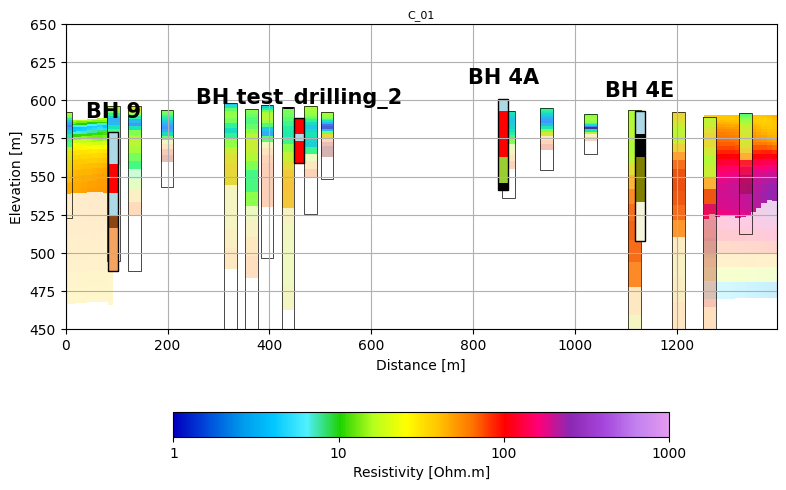

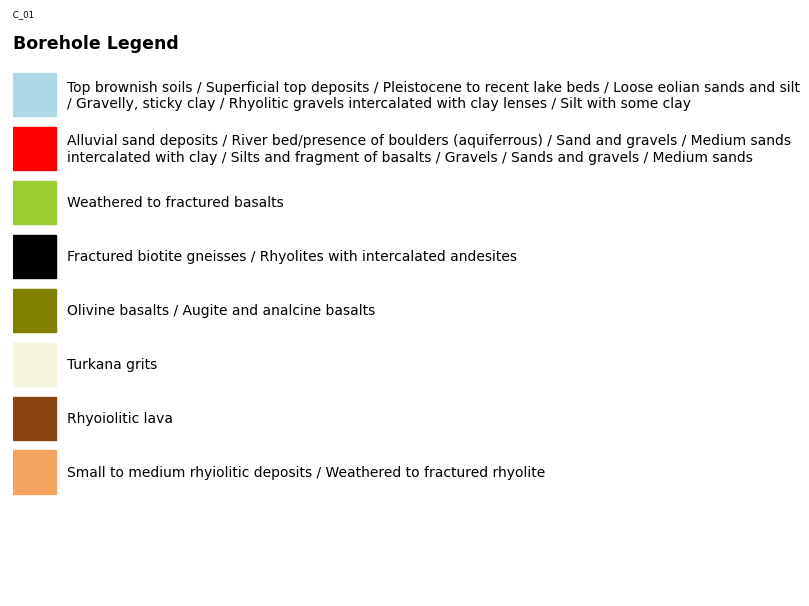

In [17]:

# Now we can create a plot object to plot the models
#background can be 'imagery' or 'osm'
plot = profiler.Plot(model)

fig, ax = plt.subplots(1, 1, figsize=(20,5))
#fig  = plt.subplots(1, 1, figsize=(20,5))
scale = 3
vmin=1
vmax=1000
#plot.TEMProfile(profile_idx=profile_idx, cmap=aarhus_cmap, zmin=450, zmax=650, ax=ax, scale=scale, cbar_orientation='horizontal', vmax=vmax)
plot.TEMProfile(profile_idx=profile_idx, zmin=450, zmax=650,ax=ax , scale=scale, cbar_orientation='horizontal', vmax=vmax)
#cbar_ax = fig.axes[-1]  # Access the last created axes, which should be the colorbar
#cbar_ax.set_position([0.75, 0.07, 0.24, 0.1])  # fits for zmin=450, zmax=650 figsize=(20,5)
#plot.addTEMSoundings(profile_idx=0, stem_model_idx=0, search_radius=100, model_width=35, ax=None, print_msg=False, vmax=vmax)
#plot.addTEMSoundings(profile_idx=profile_idx, stem_model_idx=1, search_radius=100, model_width=35,ax=None, print_msg=False, vmax=vmax)
plot.addProfilerSoundings(profile_idx=profile_idx, profiler_model_idx=0, search_radius=50, model_width=25, ax=ax, print_msg=False, vmax=vmax)
plotted_boreholes_tuple = plot.addBoreholes(profile_idx=profile_idx, ax=ax, search_radius = 150, bh_width=20 , print_msg=True, alpha=1, add_label=True,text_size=15, shift=20) #we get the plotted boreholes and the profile idx in plotted_boreholes_tuple
# Add the borehole legend as a separate image, passing the plotted boreholes
plot.addBoreholeLegend(plotted_boreholes_tuple, text_size=10, max_char=100)




(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='Easting [m]', ylabel='Northing [m]'>)

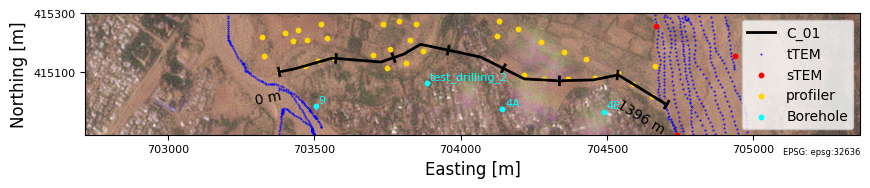

In [ ]:

tif_file = '../Kakuma/Testing/Kakuma_epsg_32636.tif'

plot.profileMap(profile_idx=profile_idx, buffer=0.5, ax=None, tif_file=tif_file, modeltype_1_size=0.2)